In [2]:
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [3]:
a = pd.read_json("data\AMD-19.json", orient = "columns", precise_float = True)["close"]
b = pd.read_json("data\Microsoft-19.json", orient = "columns", precise_float = True)["close"]
c = pd.read_json("data\Apple-19.json", orient = "columns", precise_float = True)["close"]
d = pd.read_json("data\ATT-19.json", orient = "columns", precise_float = True)["close"]
e = pd.read_json("data\Boeing-19.json", orient = "columns", precise_float = True)["close"]
f = pd.read_json("data\CVS-19.json", orient = "columns", precise_float = True)["close"]
g = pd.read_json("data\Delta-Airlines-19.json", orient = "columns", precise_float = True)["close"]
h = pd.read_json("data\Disney-19.json", orient = "columns", precise_float = True)["close"]
i = pd.read_json("data\Exxon-19.json", orient = "columns", precise_float = True)["close"]
j = pd.read_json("data\GM-19.json", orient = "columns", precise_float = True)["close"]
k = pd.read_json("data\GOOGL-19.json", orient = "columns", precise_float = True)["close"]
l = pd.read_json("data\JP-Morgan-19.json", orient = "columns", precise_float = True)["close"]
m = pd.read_json("data\Pfizer-19.json", orient = "columns", precise_float = True)["close"]
n = pd.read_json("data\Walmart-19.json", orient = "columns", precise_float = True)["close"]

df_pivot=pd.DataFrame({"AMD":a, "MSFT":b, "Apple":c, "ATT":d,"Boeing":e,"CVS":f,"Delta Air:":g,"Disney":h,"Exxon":i,"GM":j,"Google":k,"JP-Morgan":l,"Pfizer":m,"Walmart":n})

In [4]:
corr_df = df_pivot.corr(method='pearson')

In [5]:
corr_df.head()

,AMD,MSFT,Apple,ATT,Boeing,CVS,Delta Air:,Disney,Exxon,GM,Google,JP-Morgan,Pfizer,Walmart
AMD,1.000000,0.919796,0.839758,0.746620,-0.176544,-0.734700,0.851287,0.808046,0.312227,-0.018468,0.214954,0.729915,0.121850,0.825161
MSFT,0.919796,1.000000,0.844989,0.759110,-0.279363,-0.793300,0.842648,0.907193,0.259362,-0.083309,0.220771,0.806540,0.053916,0.888952
Apple,0.839758,0.844989,1.000000,0.550399,0.006094,-0.774111,0.896528,0.683172,0.646216,0.269587,0.601701,0.767969,-0.140450,0.655415
ATT,0.746620,0.759110,0.550399,1.000000,-0.318411,-0.566798,0.663110,0.660398,0.145950,-0.089277,0.011420,0.518063,0.357850,0.800692
Boeing,-0.176544,-0.279363,0.006094,-0.318411,1.000000,0.144078,-0.151480,-0.374233,0.509729,0.716830,0.281639,-0.159613,0.012464,-0.213856


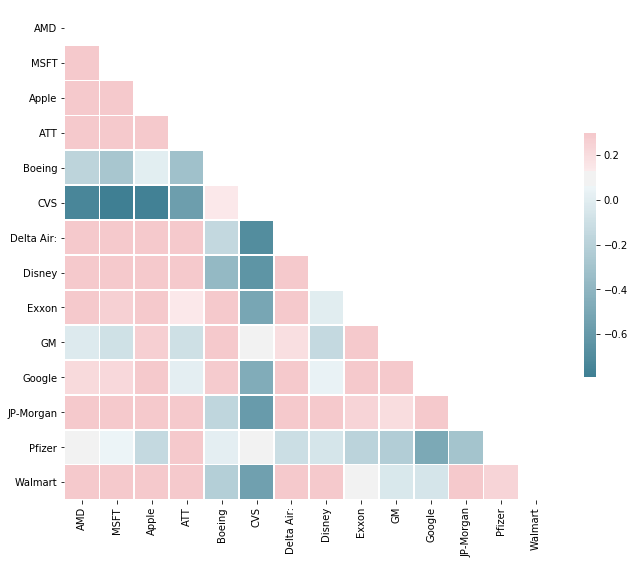

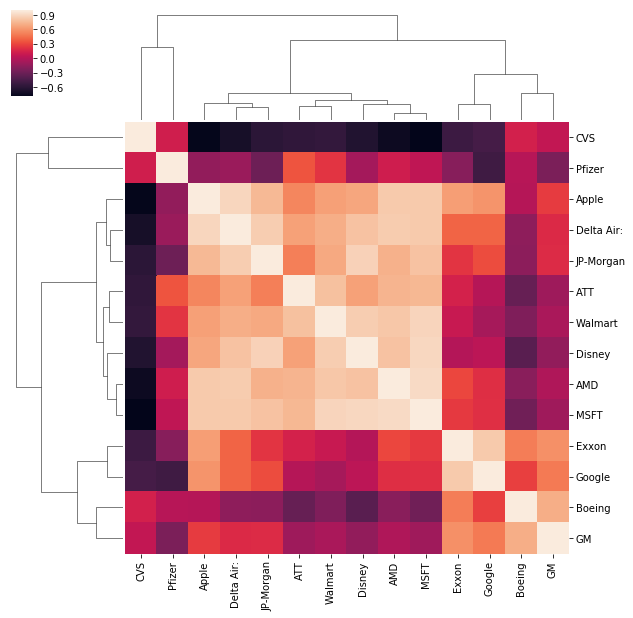

In [6]:
# Compute the correlation matrix
corr =corr_df

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0.1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
sns.clustermap(corr)